Install the new version of TensorFlow.

In [ ]:
!pip install tensorflow==2.0.0  
import tensorflow as tf

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 450kB 39.5MB/s 
     |████████████████████████████████| 3.8MB 18.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=4b11c68b7dcaad8dca02aca4c22cf295b0849a5b521dadaf6d4f0accd3d4ac1a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:


Load the dataset as train and test data.





In [ ]:
import numpy

# Ratio of data per category that is used. (Not discarded...)
used_ratio = 0.03
# Ratio of data per category that is used as train data.
train_ratio = 0.8

categories = [
  "moon",
  "rain",
  "flower",
  "mountain",
  "star",
  "cloud",
  "sun",
  "tree"
]

X_train = None
X_test = None
y_train = None
y_test = None


def load_category(category, label):
  global X_train, X_test, y_train, y_test

  # Download the category.
  path = category + ".npy"
  var = "\"gs://quickdraw_dataset/full/numpy_bitmap/" + path + "\""
  # var  = "gs://quickdraw_dataset/full/numpy_bitmap/*" 
  !gsutil -m cp $var .

  # Load the downloaded data
  data = numpy.load(path)
  data = data[:(int) (used_ratio * len(data))]
  
  # Determine the train to test ratio
  border = (int) (train_ratio * data.shape[0])
  
  # The labels for the current category
  test = [label] * (data.shape[0] - border)
  train = [label] * border

  # Load train, test, and labels extracted from this category
  if X_train is not None:
    X_train = numpy.concatenate((X_train, data[:border]))
    X_test = numpy.concatenate((X_test, data[border:]))
    y_train = y_train + train
    y_test = y_test + test
  else:
    X_train = data[:border]
    X_test = data[border:]
    y_train = train
    y_test = test
  
  print("\nCategory successfully loaded: " + category)
  print("Train Data's Shape: " + str(X_train.shape))
  print("Test Data's Shape: " + str(X_test.shape))
  print("Train Labels' Length: " + str(len(y_train)))
  print("Test Labels' Length: " + str(len(y_test)) + "\n")

def shuffle(input, labels):
  randomize = numpy.arange(len(input))
  numpy.random.shuffle(randomize)
  input = input[randomize]
  labels = [labels[random] for random in randomize]
  return input, labels

for i in range(len(categories)):
  load_category(categories[i], i)

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

Copying gs://quickdraw_dataset/full/numpy_bitmap/moon.npy...
\ [1/1 files][ 91.0 MiB/ 91.0 MiB] 100% Done                                    
Operation completed over 1 objects/91.0 MiB.                                     

Category successfully loaded: moon
Train Data's Shape: (2919, 784)
Test Data's Shape: (730, 784)
Train Labels' Length: 2919
Test Labels' Length: 730

Copying gs://quickdraw_dataset/full/numpy_bitmap/rain.npy...
\ [1/1 files][100.7 MiB/100.7 MiB] 100% Done                                    
Operation completed over 1 objects/100.7 MiB.                                    

Category successfully loaded: rain
Train Data's Shape: (6151, 784)
Test Data's Shape: (1538, 784)
Train Labels' Length: 6151
Test Labels' Length: 1538

Copying gs://quickdraw_dataset/full/numpy_bitmap/flower.npy...
| [1/1 files][108.3 MiB/108.3 MiB] 100% Done                                    
Operation completed over 1 objects/108.3 MiB.                                    

Category successfully

In [ ]:
import math

train_img_size = int(math.sqrt(X_train.shape[1]))
test_img_size = int(math.sqrt(X_test.shape[1]))

X_train = X_train.reshape(X_train.shape[0], train_img_size, train_img_size, 1)
X_test = X_test.reshape(X_test.shape[0], test_img_size, test_img_size, 1)

print('Train reshaped:', X_train.shape)
print('Test reshaped: ', X_test.shape)


Train reshaped: (25579, 28, 28, 1)
Test reshaped:  (6399, 28, 28, 1)


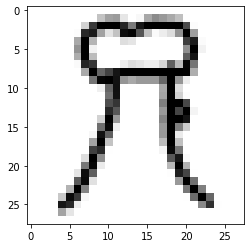

tree


In [ ]:
import matplotlib.pyplot as plt

index = 8

#plot the first image in the dataset
plt.imshow(X_train[index].reshape(train_img_size, train_img_size), cmap = 'binary')

plt.show()

label = [i for i in range(len(y_train[index])) if y_train[index][i] == 1][0]
print(categories[label])

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[4]

Using TensorFlow backend.


array([0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
# create
model = Sequential()

model.add(Conv2D(16, kernel_size = [3, 3], activation= 'relu', input_shape = (train_img_size, train_img_size, 1)))
model.add(MaxPooling2D(pool_size=[2, 2], strides=None))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size = [3, 3], activation= 'relu'))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
model.add(Dropout(0.1))
model.add(Conv2D(64, kernel_size = [3, 3], activation= 'relu'))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(len(categories), activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

val_border = (int) (0.2 * X_train.shape[0])
model.fit(X_train[:-val_border], y_train[:-val_border], validation_data=(X_train[-val_border:], y_train[-val_border:]), epochs = 10)

print("Test Accuracy: " + str(model.evaluate(X_test, y_test)[1]))

Train on 20464 samples, validate on 5115 samples
Epoch 1/10
20464/20464 [==============================] - 15s 731us/sample - loss: 1.2164 - accuracy: 0.6662 - val_loss: 0.5034 - val_accuracy: 0.8364
Epoch 2/10
20464/20464 [==============================] - 14s 695us/sample - loss: 0.4471 - accuracy: 0.8590 - val_loss: 0.3242 - val_accuracy: 0.8995
Epoch 3/10
20464/20464 [==============================] - 14s 693us/sample - loss: 0.3559 - accuracy: 0.8874 - val_loss: 0.3032 - val_accuracy: 0.9097
Epoch 4/10
20464/20464 [==============================] - 14s 694us/sample - loss: 0.3001 - accuracy: 0.9053 - val_loss: 0.2894 - val_accuracy: 0.9105
Epoch 5/10
20464/20464 [==============================] - 14s 701us/sample - loss: 0.2648 - accuracy: 0.9151 - val_loss: 0.2635 - val_accuracy: 0.9191
Epoch 6/10
20464/20464 [==============================] - 14s 704us/sample - loss: 0.2488 - accuracy: 0.9182 - val_loss: 0.2466 - val_accuracy: 0.9224
Epoch 7/10
20464/20464 [=====================

In [ ]:
# import pickle


#  with open('trained_model.pickle', 'wb') as handle:
#         pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

from keras.models import model_from_json
model_json = model.to_json()
with open("trained_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("saved model")


saved model


In [ ]:
import pickle

with open('categories.pickle', 'wb') as handle:
  pickle.dump(categories, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load Model

from tensorflow.keras.models import model_from_json

json_file = open('trained_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('model.h5')

def evaluate_model(model, data, labels):
  predictions = model.predict_classes(data)
  
  incorrect_per = []
  for cat in categories:
    incorrect_per.append(0)

  incorrectly_predicted_as = []
  for cat in categories:
    incorrectly_predicted_as.append(0)
  
  corrects = 0
  incorrects = 0
  for i in range(len(data)):
    if labels[i][predictions[i]] == 1:
      corrects += 1
    else:
      incorrects += 1
      
      correct = 0
      for j in range(len(labels[i])):
          if labels[i][j] == 1:
            correct = j
            break
      incorrect_per[correct] += 1

      incorrectly_predicted_as[predictions[i]] += 1
  
  print("Correct predictions: " + str(corrects))
  print("Incorrect predictions: " + str(incorrects))

  print("")

  for i in range(len(incorrect_per)):
    print("The category " + categories[i] + " was incorrectly predicted " + str(incorrect_per[i]) + " times!")

  print("")

  for i in range(len(incorrect_per)):
    print("The category " + categories[i] + " was incorrectly predicted " + str(incorrectly_predicted_as[i]) + " times instead of the actual label!")

evaluate_model(loaded_model, X_test, y_test)

Correct predictions: 5981
Incorrect predictions: 418

The category moon was incorrectly predicted 49 times!
The category rain was incorrectly predicted 38 times!
The category flower was incorrectly predicted 64 times!
The category mountain was incorrectly predicted 28 times!
The category star was incorrectly predicted 69 times!
The category cloud was incorrectly predicted 47 times!
The category sun was incorrectly predicted 42 times!
The category tree was incorrectly predicted 81 times!

The category moon was incorrectly predicted 66 times instead of the actual label!
The category rain was incorrectly predicted 57 times instead of the actual label!
The category flower was incorrectly predicted 73 times instead of the actual label!
The category mountain was incorrectly predicted 24 times instead of the actual label!
The category star was incorrectly predicted 51 times instead of the actual label!
The category cloud was incorrectly predicted 61 times instead of the actual label!
The cate